In [22]:
%matplotlib inline
#%config InlineBackend.figure_format='svg'
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.signal import savgol_filter   # smooth the data
plt.style.use('seaborn-white')
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [23]:
pT1 = pd.read_csv("C:/Users/jing/Downloads/workshop/argon37_online.csv")
pT1.columns = ['DateTime','id','PM1_standard','PM2.5_standard','PM10_standard', 'PM0.3','PM0.5','PM1','PM2.5','PM5','PM10','Shinyei','Temp','RH']
pT1['DateTime'] = pd.to_datetime(pT1['DateTime'])

In [24]:
pT1.info()
pT1.head()
#cols = pT1.columns[pT1.dtypes.eq('object')]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
DateTime          37 non-null datetime64[ns]
id                37 non-null int64
PM1_standard      37 non-null int64
PM2.5_standard    37 non-null int64
PM10_standard     37 non-null int64
PM0.3             37 non-null int64
PM0.5             37 non-null int64
PM1               37 non-null int64
PM2.5             37 non-null int64
PM5               37 non-null int64
PM10              37 non-null int64
Shinyei           37 non-null float64
Temp              37 non-null float64
RH                37 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 4.1 KB


,DateTime,id,PM1_standard,PM2.5_standard,PM10_standard,PM0.3,PM0.5,PM1,PM2.5,PM5,PM10,Shinyei,Temp,RH
0,2019-08-06 16:30:04,82992,3,4,5,810,231,46,2,2,0,4.645917,25.610001,50.860001
1,2019-08-06 16:30:10,82993,4,5,6,714,206,42,2,2,0,10.743176,25.620001,50.840000
2,2019-08-06 16:30:17,82994,3,5,6,696,198,38,2,2,0,7.903648,25.639999,50.840000
3,2019-08-06 16:30:23,82995,3,4,5,645,183,32,2,2,0,3.354207,25.650000,50.849998
4,2019-08-06 16:30:32,82996,2,3,3,540,150,20,0,0,0,2.210116,25.650000,50.900002


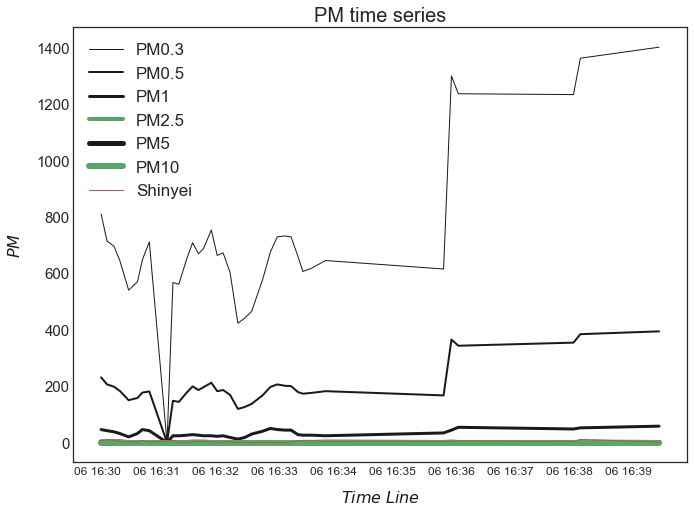

In [25]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11, 8)
t = pT1['DateTime']
#t=pT1['DateTime']
ax1.plot(t,pT1['PM0.3'], 'k-', lw=1,label='PM0.3')
ax1.plot(t,pT1['PM0.5'], 'k-', lw=2,label='PM0.5')
ax1.plot(t,pT1['PM1'], 'k-', lw=3,label='PM1')
ax1.plot(t,pT1['PM2.5'], 'g-', lw=4,label='PM2.5')
ax1.plot(t,pT1['PM5'], 'k-', lw=5,label='PM5')
ax1.plot(t,pT1['PM10'], 'g-', lw=6,label='PM10')
ax1.plot(t,pT1['Shinyei'],'r-',lw=1,label='Shinyei')

plt.xticks(size = 12)
plt.yticks(size = 15)
#plt.yscale("log") 
plt.title('PM time series',fontsize=20)
ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('$PM$',color='k',fontsize=16,labelpad=13)


ax1.grid(False)

ax1.legend(loc='best',fontsize=17,markerscale=4)

#for label in ax1.xaxis.get_ticklabels():
#       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))


plt.savefig('PMvsTime.png',dpi=300)


In [28]:
#pT2 = pd.read_csv("C:/Users/jing/Downloads/workshop/argon37_offline_1.csv") # offline data
#pT2.columns = pT1.columns
pT3 = pd.read_csv("C:/Users/jing/Downloads/workshop/argon37_3_online.csv") #second online data
pT3.columns = pT1.columns
pT3['DateTime'] = pd.to_datetime(pT3['DateTime'])
pT3[:3]
#t0 = pT1.iloc[-1].DateTime
#pT2.replace(to_replace=[pT2.iloc[0].DateTime],value=t0) # replace the start and end time

#pT2.replace(to_replace=[pT2.iloc[-1].DateTime],value=pT3.iloc[0].DateTime) # replace the start and end time

#pT2[:3]
#pT2.to_csv("pT2.csv", encoding='utf-8', index=False)
# sampling interval calculated is 6.89031020147106 sec

,DateTime,id,PM1_standard,PM2.5_standard,PM10_standard,PM0.3,PM0.5,PM1,PM2.5,PM5,PM10,Shinyei,Temp,RH
0,2019-08-07 10:36:55,83030,1,1,1,390,120,6,0,0,0,0.781290,27.910000,47.889999
1,2019-08-07 10:37:03,83031,1,1,3,363,98,6,2,2,2,1.211798,27.940001,47.980000
2,2019-08-07 10:37:11,83032,1,2,3,405,106,14,2,2,2,0.000000,27.889999,48.099998


In [29]:
pT2 = pd.read_csv("C:/Users/jing/Downloads/workshop/pT2.csv") # offline data
pT2['DateTime'] = pd.to_datetime(pT2['DateTime'])
pT2[:3]


,DateTime,id,PM1_standard,PM2.5_standard,PM10_standard,PM0.3,PM0.5,PM1,PM2.5,PM5,PM10,Shinyei,Temp,RH
0,2019-08-06 16:39:07,83030,400,780,824,60081,18312,5922,529,42,6,0,20.32,70.48
1,2019-08-06 16:39:13,83031,334,659,707,0,0,0,0,0,0,0,20.37,70.55
2,2019-08-06 16:39:20,83032,343,651,687,51984,16073,5213,397,40,16,0,20.36,70.62


In [30]:
# join all 3 segments
frames = [pT1, pT2, pT3]
pT = pd.concat(frames)
#pT.columns = pT1.columns
pT['DateTime'] = pd.to_datetime(pT['DateTime'])
pT.index = pT['DateTime']
pT.shape
pT.head(5)
#pT.index=pT('id')


,DateTime,id,PM1_standard,PM2.5_standard,PM10_standard,PM0.3,PM0.5,PM1,PM2.5,PM5,PM10,Shinyei,Temp,RH
DateTime,,,,,,,,,,,,,,
2019-08-06 16:30:04,2019-08-06 16:30:04,82992,3,4,5,810,231,46,2,2,0,4.645917,25.610001,50.860001
2019-08-06 16:30:10,2019-08-06 16:30:10,82993,4,5,6,714,206,42,2,2,0,10.743176,25.620001,50.840000
2019-08-06 16:30:17,2019-08-06 16:30:17,82994,3,5,6,696,198,38,2,2,0,7.903648,25.639999,50.840000
2019-08-06 16:30:23,2019-08-06 16:30:23,82995,3,4,5,645,183,32,2,2,0,3.354207,25.650000,50.849998
2019-08-06 16:30:32,2019-08-06 16:30:32,82996,2,3,3,540,150,20,0,0,0,2.210116,25.650000,50.900002


In [ ]:
pT[:10]
pT.to_csv (r'pT.csv', header=True) #Don't forget to add '.csv' at the end of the path


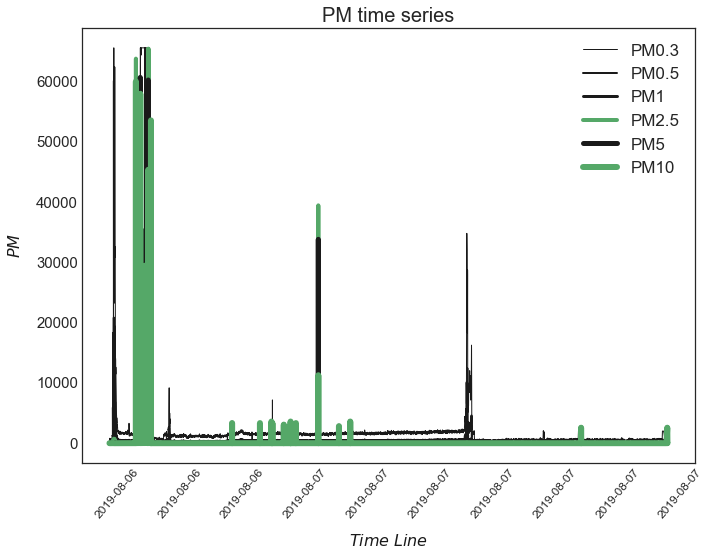

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
t = pT.index
ax.plot(t,pT['PM0.3'], 'k-', lw=1,label='PM0.3')
ax.plot(t,pT['PM0.5'], 'k-', lw=2,label='PM0.5')
ax.plot(t,pT['PM1'], 'k-', lw=3,label='PM1')
ax.plot(t,pT['PM2.5'], 'g-', lw=4,label='PM2.5')
ax.plot(t,pT['PM5'], 'k-', lw=5,label='PM5')
ax.plot(t,pT['PM10'], 'g-', lw=6,label='PM10')

plt.xticks(size = 12)
plt.yticks(size = 15)
#plt.yscale("log") 
plt.title('PM time series',fontsize=20)
ax.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax.set_ylabel('$PM$',color='k',fontsize=16,labelpad=13)

ax.grid(False)

ax.legend(loc='best',fontsize=17,markerscale=4)


for label in ax.xaxis.get_ticklabels():
       label.set_rotation(50)
ax.xaxis.set_major_locator(mticker.MaxNLocator(12))   

plt.savefig('PMvsTimealldata.png',dpi=150)

[(0, 100)]

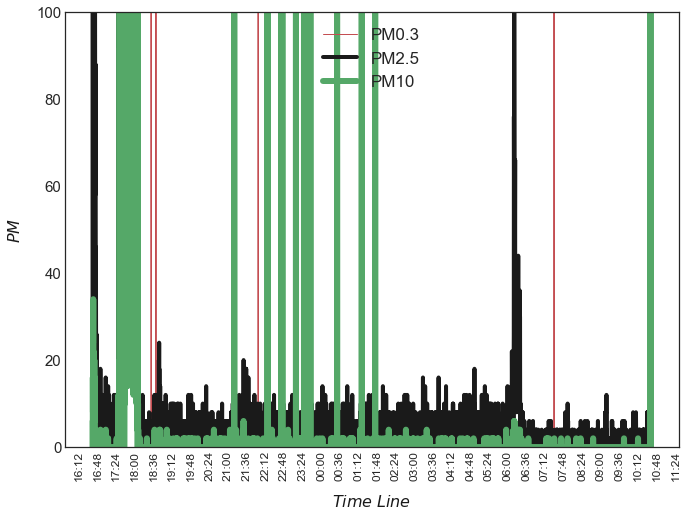

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
pT2.index=pT2['DateTime']
t = pT2.index
ax.plot(t,pT2['PM0.3'], 'r-', lw=1,label='PM0.3')
#ax.plot(t,pT2['PM0.5'], 'k-', lw=2,label='PM0.5')
#ax.plot(t,pT2['PM1'], 'k-', lw=3,label='PM1')
ax.plot(t,pT2['PM2.5'], 'k-', lw=4,label='PM2.5')
#ax.plot(t,pT2['PM5'], 'k-', lw=5,label='PM5')
ax.plot(t,pT2['PM10'], 'g-', lw=6,label='PM10')

plt.xticks(size = 12)
plt.yticks(size = 15)
#plt.yscale("log") 
#plt.title('PM time series',fontsize=20)
ax.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax.set_ylabel('$PM$',color='k',fontsize=16,labelpad=13)

ax.grid(False)

ax.legend(loc='best',fontsize=17,markerscale=4)


for label in ax.xaxis.get_ticklabels():
       label.set_rotation(90)
ax.xaxis.set_major_locator(mticker.MaxNLocator(36))   

myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set(ylim=(0, 100))

#plt.savefig('PMvsTimedata2.png',dpi=300)

In [ ]:
plt.figure(figsize=(7,7))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.scatter(df['pm2.5hw1'],df['pm2.5'], s=10, color= 'k',alpha=0.9,label='hw1')
plt.scatter(df['pm2.5hw2'],df['pm2.5'],s=10, color= 'r',alpha=0.9,label='hw2')


plt.legend( loc='best',fontsize=17)

plt.title("Test with pT1", fontsize=16)
plt.ylabel('pT1 pm2.5',fontsize=16,color='k',labelpad=13)
plt.xlabel('Honeywell pm2.5',fontsize=16,color='k',labelpad=13)

#plt.show()
#plt.savefig('books_read.png',dpi=300)

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df['pT1']=df['pm2.5']
df['hw1']=df['pm2.5hw1']

In [ ]:
results = smf.ols('pT1 ~ hw1', data=df).fit()

In [ ]:
print(results.summary())

In [ ]:
df['chw1']=df['hw1']*2.6652+6.8350

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.grid(False)


ax1.plot(df['DateTime'],df['pT1'], color='k',linewidth=1,label='pT1')

ax1.plot(df['DateTime'],df['chw1'], color='r',linewidth=1,label='chw1')


In [ ]:
plt.figure(figsize=(7,7))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.scatter(df['chw1'],df['pT1'],s=15, color= 'g',alpha=0.9,label='hw1')


plt.legend( loc='best',fontsize=17)

plt.title("Test with pT1", fontsize=16)
plt.ylabel('pT1 pm2.5',fontsize=16,color='k',labelpad=13)
plt.xlabel('Honeywell pm2.5',fontsize=16,color='k',labelpad=13)

#plt.show()
#plt.savefig('books_read.png',dpi=300)

In [ ]:
import seaborn as sns
ax = sns.regplot(x="chw1", y="pT1", data=df)

In [ ]:
sns.residplot(df['chw1'],df['pT1'] )